<a href="https://colab.research.google.com/github/seoyujiin/esaa_yb/blob/main/9%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Chapter 4 분류**

**1. 분류(Classification)의 개요**
  
  지도학습의 대표적인 유형인 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다


  분류를 구현하는 머신러닝 알고리즘
  * 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
  * 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
  * 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
  * 개별 클래스 간의 최대 분류 마진을 효괒거으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
  * 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
  * 심층 연결 기반의 신경망(Neural Network)
  * 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

**앙상블**

이미지, 영상, 음성, NLP 영역에서 신경망에 기반한 딥러닝이 머신러닝계를 선도하고 있지만, 이를 제외한 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해 많은 분석가와 데이터 과학자들에게 애용되고 있다

앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉜다


* 배깅(Bagging) 방식
  * 랜덤 포레스트(Random Forest): 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성
* 부스팅(Boosting) 방식
  * 그래디언트 부스팅(Gradient Boosting): 뛰어난 예측 성능을 가지고 있지만 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠음
  * XgBoost(eXtra Gradient Boost)와 LightGBM 등: 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘 계속 등장 → 정형 데이터의 분류 영역에서 가장 활용도 높은 알고리즘으로 자리 잡음

**2. 결정 트리**

결정 트리(Decision Tree): ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘, 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것

* 결정 트리의 구조
  * 규칙 노드(Decision Node): 규칙 조건
  * 리프 노드(Leaf Node): 결정된 클래스 값
  * 서브 트리(Sub Tree): 새로운 규칙 조건마다 생성
* 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다 하지만 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고 이는 곧 과적합으로 이어지기 쉽다
* 즉 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다
* 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다 → 이를 위해서는 어떻게 트리를 분할(Split)할 것인가가 중요한데 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요하다
* 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다 즉 정보 균일도가 데이터 세트로 조개질 수 있도록 조건을 찾아 서브 데이터 세트로 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다
* 정보의 균일도를 측정하는 대표적인 방법: 엔트로피를 이용한 정보 이득(Information Gain) 지수, 지니 계수
  * 정보 이득(1-엔트로피지수)은 엔트로피라는 개념을 기반으로 한다 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피가 낮다 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다 결정 트리는 이 정보 이득 지수로 분할 기준을 정하며 정보 이득이 높은 속성을 기준으로 분할한다
  * 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수로 0이 가장 평등하고 1로 갈수록 불평등하다 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다

**결정 트리 모델의 특징**

결정 트리 장점
* 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임, 룰이 매우 명확하고 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고 시각화로 표현까지 할 수 있음
* 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음(사전 가공 영향도가 크지 않음)

결정 트리 단점
* 과적합으로 정확도가 떨어짐, 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

**결정 트리 파라미터**
* DecisionTreeClassifier - 분류를 위한 클래스
* DecisionTreeRegressor - 회귀를 위한 클래스
* 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반, CART는 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘

|파라미터 명|설명|
|:---|:---|
|min_samples_split|노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨|
||디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가|
||과적합을 제어, 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가|
|min_samples_leaf|말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수|
||Min_samples_split와 유사하게 과적합 제어 용도, 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요|
|max_features|최적의 분할을 위해 고려할 최대 피처 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행|
||int형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임|
||'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)만큼 선정|
||'auto'로 지정하면 sqrt와 동일|
||'log'는 전체 피처 중 log2(전체 피처 개수) 선정|
||'None'은 전체 피처 선정|
|max_depth|트리의 최대 깊이를 규정|
||디폴트는 None, None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴|
||깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요|
|max_leaf_nodes|말단 노드(Leaf)의 최대 개수|

**결정 트리 모델의 시각화**

Graphviz 패키지: 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지

사이킷런은 export_graphviz() API 제공 - export_graphviz()는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌

In [17]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [19]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

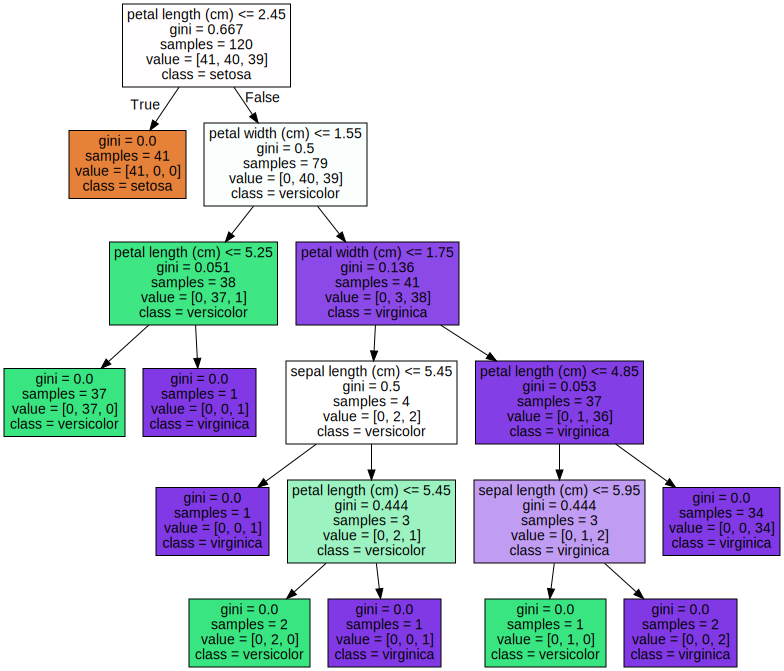

In [20]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

* 리프 노드: 더 이상 자식 노드가 없는 노드, 최종 클래스(레이블) 값이 결정되는 노드, 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨
* 브랜치 노드: 자식 노드가 있는 노드, 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음
---
* petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건(이 조건이 없으면 리프 노드)
* gini: 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
* samples: 현 규칙에 해당하는 데이터 건수
* value=[]는 클래스 값 기반의 데이터 건수(ex. 붓꽃 데이터 세트는 클래스 값이므로 0, 1, 2(0:Setosa, 1:Versicolor, 2:virginica), 만일 Value=[41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Verginica 39개로 구성돼 있다는 의미)
---
* 각 노드의 색깔: 붓꽃 데이터의 레이블 값(주황색0: Setosa, 초록색1: Veirsicolor, 보라색2: Virginica), 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음
* 결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속 만듦 → 매우 복잡한 규칙 트리 만들어져 모델이 쉽게 과적합되는 문제 → 결정 트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도
* 하이퍼 파라미터
  * max_depth: 결정 트리의 최대 트리 깊이 제어
  * min_samples_split: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
  * min_samples_leaf: 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값 지정, min_samples_leaf 값을 키우면 더 이상 분할하지 않고 리프 노드가 될 수 있는 조건이 완화됨
---
* 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건 → 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있기 때문
* 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공
* feature_importances_는 ndarray 형태로 값 반환, 피처 순서대로 값이 할당됨, 값이 높을수록 해당 피처의 중요도가 높다는 의미(ex. feature_importances_가 [0.016, 0.025, 0.032, 0.926]라면 첫 번째 피처의 피처 중요도가 0.016, 두 번째 피처는 0.025와 같이 매치됨)

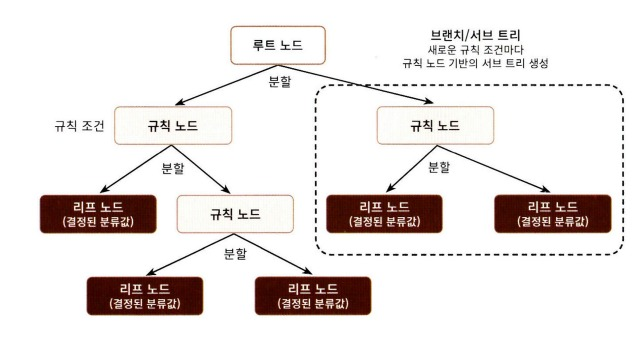

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<Axes: >

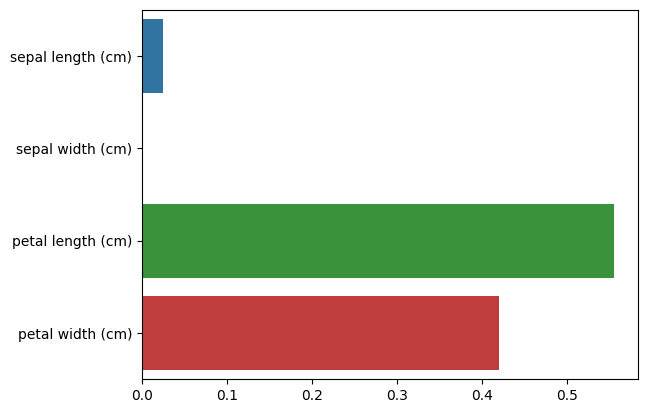

In [21]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}: {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

**결정 트리 과적합(Overfitting)**

사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수 제공

make_classification() 호출 시 반환되는 객체: 피처 데이터 세트와 클래스 레이블 데이터 세트

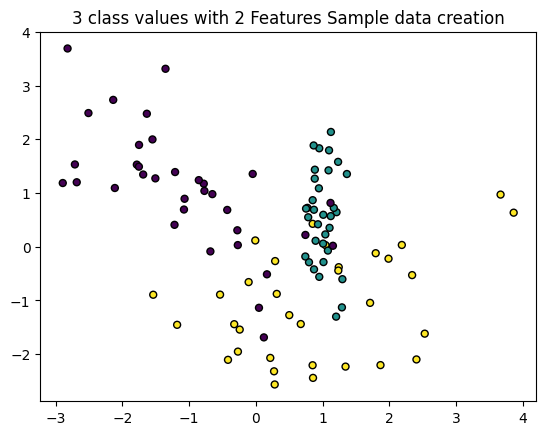

In [22]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

# 각 피처가 X, Y축으로 나열된 2차원 그래프, 3개의 클래스 값 구분은 색깔로

첫 번째 학습

→ 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인

→ 이를 위해 별도의 함수인 visualize_boundary() 생성

In [23]:
import numpy as np

# visualize_boundary() 함수 # Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

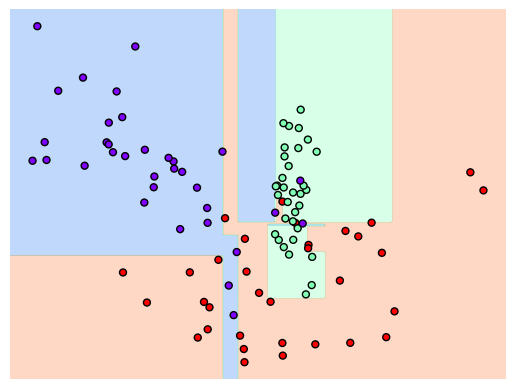

In [24]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

→ 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐

→ 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 됨

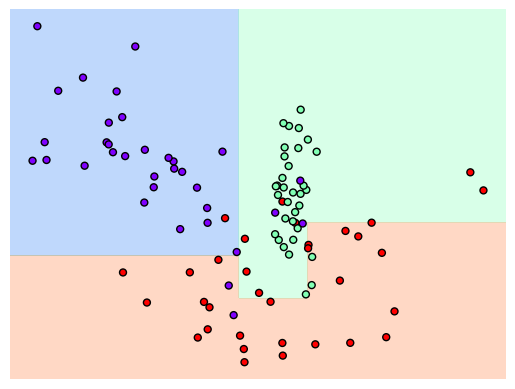

In [25]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

→ 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됨

→ 테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있음 

**3. 앙상블 학습**

* 앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다

* 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것

* 앙상블 학습의 유형: 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), etc
  * 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
  * 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘프링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
    * 대표적인 배깅 방식 → 랜덤 포레스트 알고리즘

  * 부트스트래핑(Bootstrapping) 분할 방식: 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식 → 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 바로 배깅 앙상블 방식

  * 배깅 방식은 중첩 허용(교차 검증은 데이터 세트 간에 중첨 허용x)

  * 부스팅: 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치(weight)를 부여하면서 학습과 예측을 진행하는 것
    - 대표적인 부스팅 모듈: 그래디언트 부스트, XGBoost, LightGBM

  * 스태킹: 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

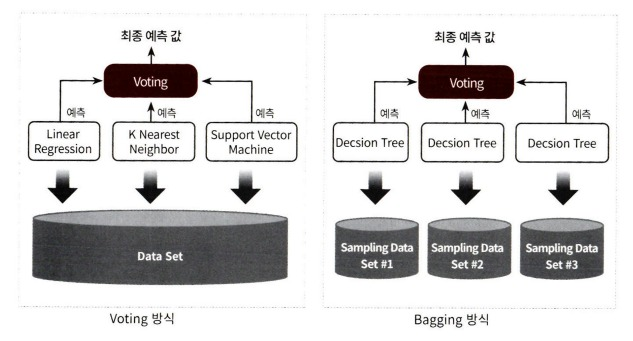

**보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**

* 하드 보팅: 예측한 결괏값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 것

* 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정함

  → 일반적으로 소프트 보팅이 예측 성능이 좋아서 더 많이 사용됨

**보팅 분류기(Voting Classifier)**

사이킷런은 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스 제공

위스콘신 유방암 데이터 세트: 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트 / 사이킷런은 load_breast_cancer() 함수를 통해 자체에서 위스콘신 유방암 데이터 세트 생성 가능



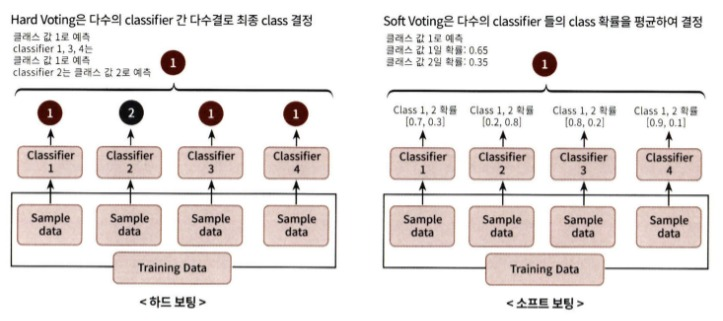

In [26]:
# 위스콘신 데이터 세트 간략히 살펴보기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [27]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


→ 보팅 분류기가 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음

→ ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 됨

→ 이런 관점에서 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제

→ 보팅과 스태킹 등은 서로 다른 알고리즘을 기반으로 하고 있지만, 배깅과 부스팅은 대부분 결정 트리 알고리즘을 기반으로 함, 결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 가지고 있지만 정확한 예측을 위해 학습 데이터의 예외 상황에 집착한 나머지 오히려 과적합이 발생해 실제 테스트 데이터에서 예측 성능이 떨어지는 현상 발생하기 쉬움

→ 하지만 앙상블 학습에서는 이 같은 결정 트리 알고리즘의 단점을 수십~수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복하고 있음

**4. 랜덤 포레스트**

* 배깅(bagging): 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

* 배깅의 대표적인 알고리즘: 랜덤 포레스트
  * 랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 수행 속도 가지고 있음, 다양한 영역에서 높은 예측 성능 보임, 랜덤 포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
  * 랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨
  * 랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임(부트스트래핑 분할 방식)
    * 랜덤 포레스트의 서브세트(Subset) 데이터는 이러한 부트승트래핑으로 데이터가 임의로 만들어짐, 서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어짐
  * 사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 프레스트 기반의 분류 지원

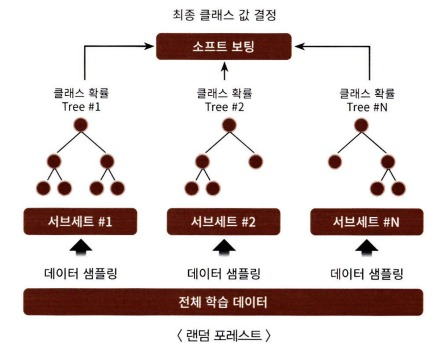

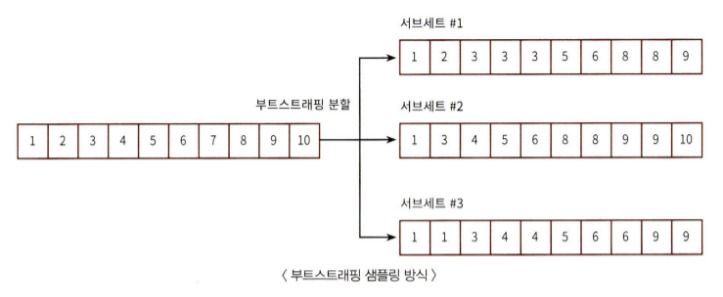

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/esaa/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/esaa/data/human_activity/train/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/esaa/data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/esaa/data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/esaa/data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


**랜덤 포레스트 하이퍼 파라미터 및 튜닝**

트리 기반의 앙상블 알고리즘의 단점: 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모됨, 더구나 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음

* 랜덤 포레스트의 하이퍼 파라미터
  * n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정, 디폴트는 10개, 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 건 아님, 또한 늘릴수록 학습 수행 시간이 오래걸리는 것 감안해야
  * max_features: 결정 트리에 사용된 max_features 파라미터와 동일, 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라'auto' 즉 'sqrt'와 같음, 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조(ex. 전체 피처가 16개라면 분할을 위해 4개 참조)
  * max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용

GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행(n_jobs=-1: 모든 CPU 코어를 이용해 학습)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


→ n_estimators: 100, max_depth: 10, min_samples_leaf: 8, min_samples_split: 8일 때 91.68% 평균 정확도

In [32]:
# n_estimators를 300으로 증가시키고, 다시 RandomForestClassifier 학습시킨 뒤 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


→ 별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치: 약 91.65%

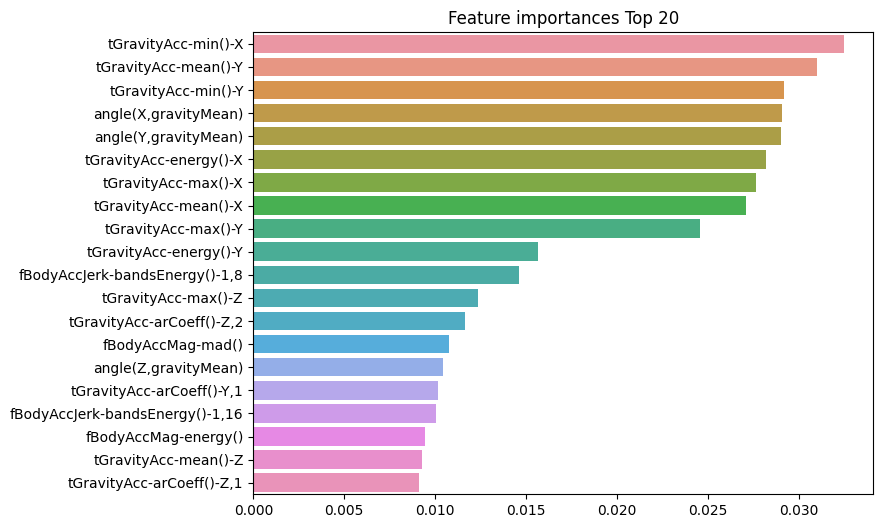

In [33]:
# feature_importances_ 속성 이용해 피처의 중요도 막대그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

**5. GBM(Gradient Boosting Machine)**

* 부스팅 알고리즘: 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
  * 부스팅의 대표적인 구현: 에이다부스트(AdaBoost), 그래디언트부스트
  * 에이다부스트: 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
    * Step 1: 첫 번째 약한 학습기(weak learner)가 분류 1로 +와 -를 분류
    * Step 2 : 이 오류 데이터에 대해서 가중치 값 부여
    * Step 3 : 두 번째 약한 학습기가 분류 기준 2로 +와 -를 분류
    * Step 4 : 잘못된 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중히 부여
    * Step 5 : 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류
    * Step 6 : 첫 번째, 두 번째, 세 번째 약한 학습기 모두 결합한 결과 예측

* GBM(Gradient Boosti Machine): 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용하는 것이 큰 차이
  * 경사 하강법(Gradient Descent): 오류식 h(x)=y-F(x)(실제값-예측값)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것
  * GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류와 회귀 가능
  * 사이킷런은 GBM 기반의 분류를 위해 GradientBoostingClassifier 클래스 제공

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 970.6 초


**GBM 하이퍼 파라미터 및 튜닝**

* loss: 경사 하강법에서 사용할 비용 함수를 지정. 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용
* learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률임 Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수로 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1, 너무 작은 값을 적용하면 업데이트되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높음 많은 weak learner은 순차적인 반복이 필요해서 수행 시간이 오래 걸리고 또 너무 작게 설정하면 모든 weak learner의 반복이 완료되어도 최소 오류 값을 찾지 못할 수 있음 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만 빠른 수행이 가능함 이러한 특성 때문에 learning_rate은 n_estimators와 상호 보완적으로 조합해 사용함 learning_rate을 작게 하고 - n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음 하지만 수행 시간이 너무 오래 걸리는 단점이 있으며 예측 성능 역시 현격히 좋아지지는 않음
* n_estimators: weak learner의 개수임. weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있음 하지만 개수가 많을수록 수행 시간이 오래 걸림 기본값은 100임
* subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율 기본값은 1이며 이는 전체 학습 데이터를 기반으로 학습한다는 의미임 (0.5면 학습 데이터의 50%) 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 500],
    'learning_rate': [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))